In [ ]:
Data Link = "https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets/data"

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2 as cv
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [42]:
path = r"/kaggle/input/covid19-xray-dataset-train-test-sets"

In [43]:
print(os.listdir(path))

['xray_dataset_covid19']


In [44]:
path = os.path.join(path , 'xray_dataset_covid19')

In [45]:
path

'/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19'

In [46]:
print(os.listdir('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19'))

['test', 'train']


In [47]:
df_train =(os.path.join(path, "train"))
df_test =(os.path.join(path, "test"))

In [48]:
df_train

'/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train'

In [49]:
os.listdir(df_train)

['PNEUMONIA', 'NORMAL']

test
---> PNEUMONIA
------> SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg


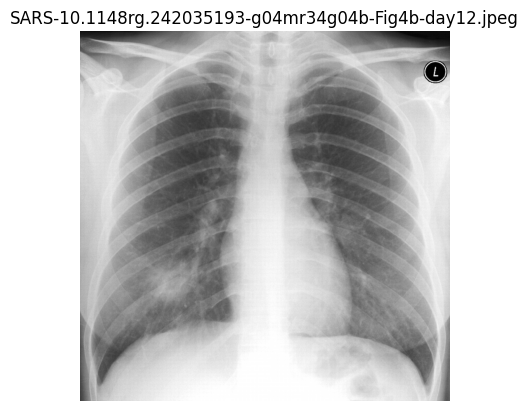

------> ryct.2020200034.fig5-day4.jpeg


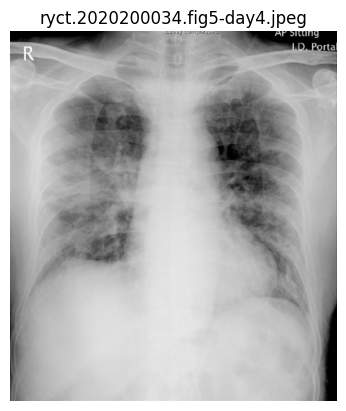

------> SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg


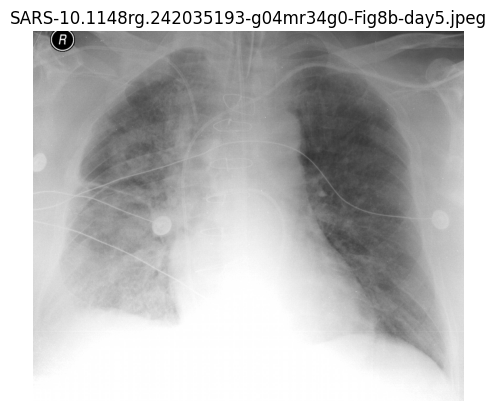

------> ryct.2020200034.fig5-day0.jpeg


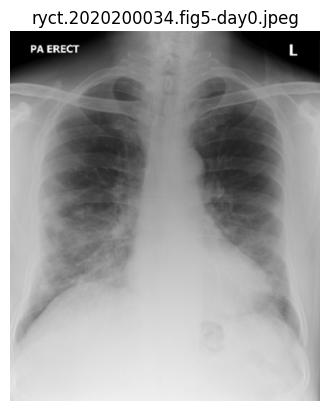

------> SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg


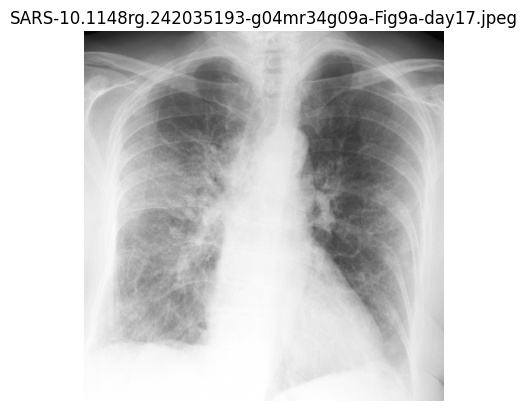

------> ryct.2020200034.fig2.jpeg


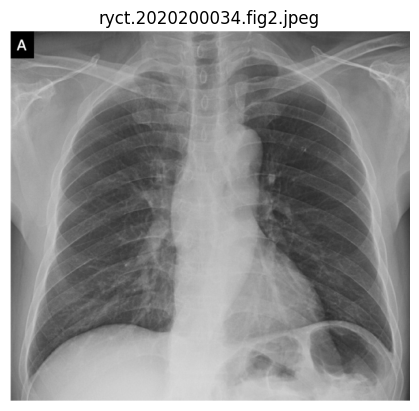

------> streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg


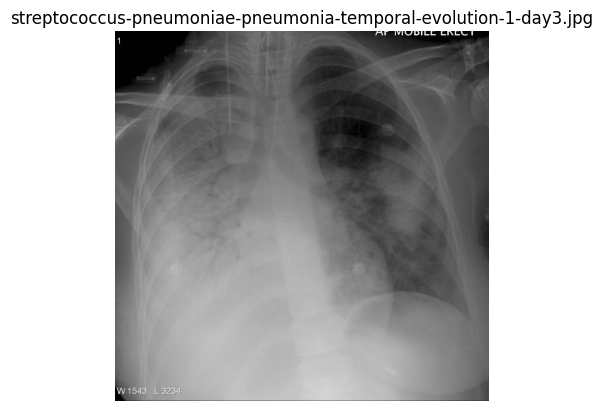

------> SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg


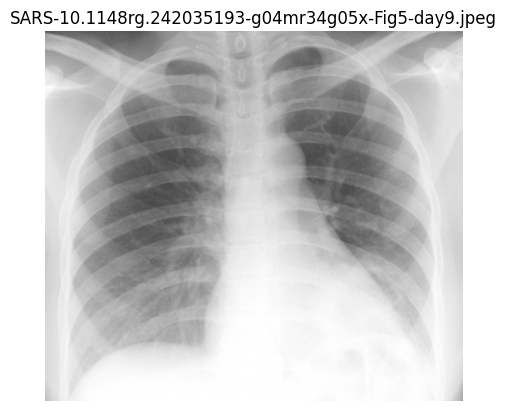

------> streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day2.jpg


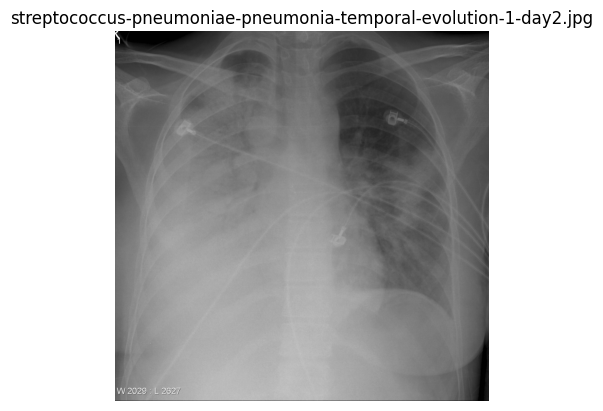

------> SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg


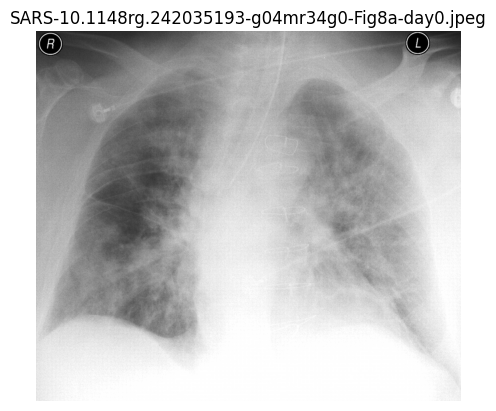

------> streptococcus-pneumoniae-pneumonia-1.jpg


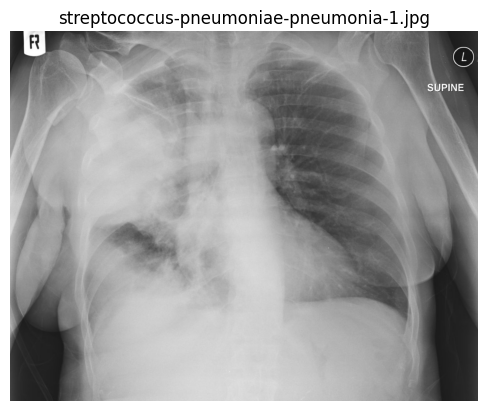

------> ryct.2020200034.fig5-day7.jpeg


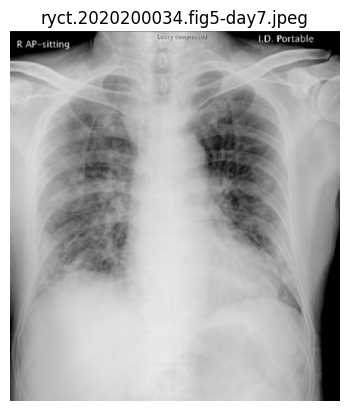

------> SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg


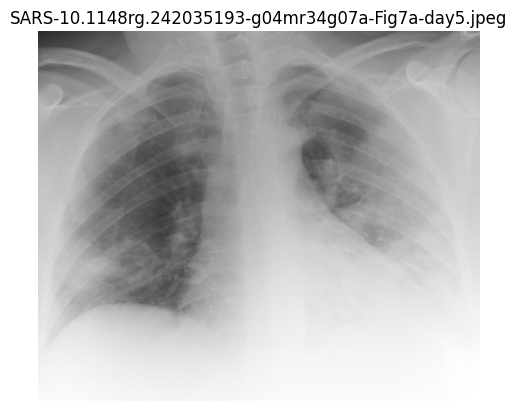

------> SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg


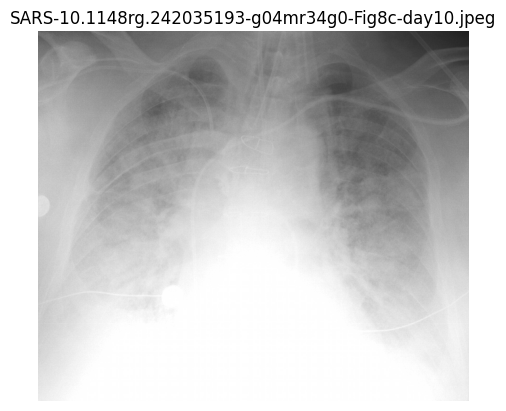

------> SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg


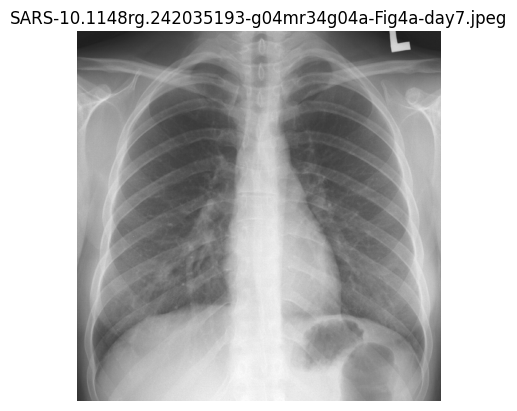

------> streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day0.jpg


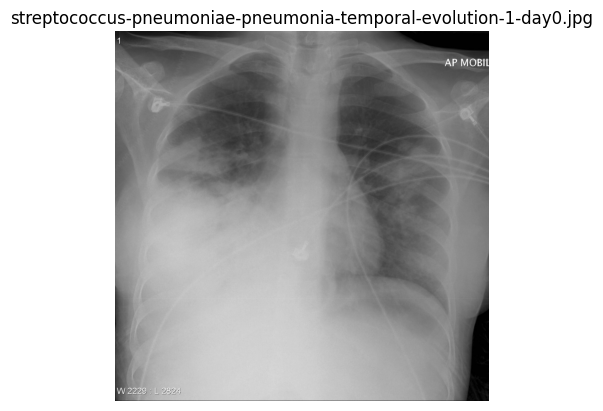

------> SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day12.jpeg


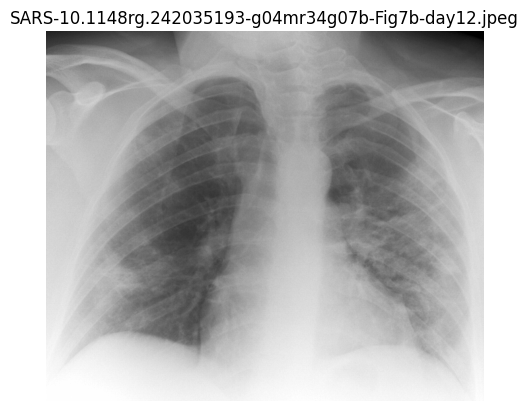

------> streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day1.jpg


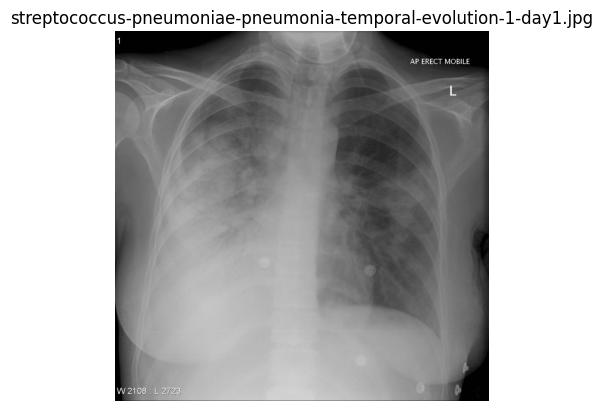

------> SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg


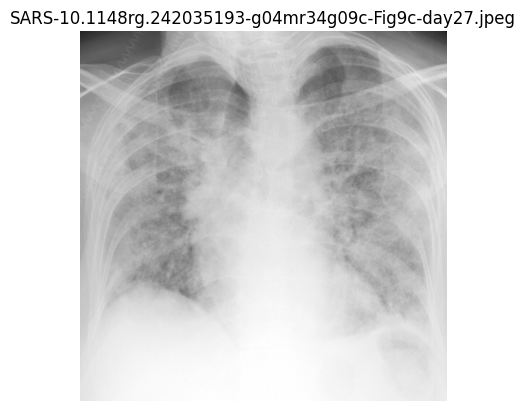

------> SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg


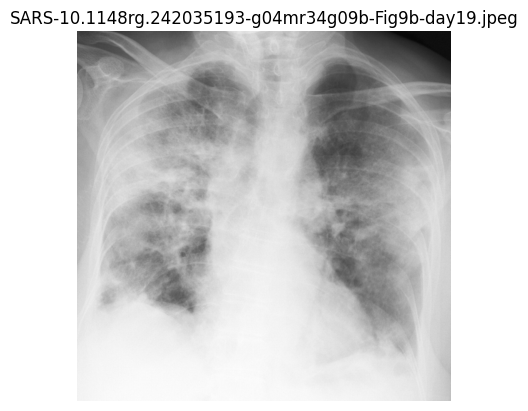

---> NORMAL
------> NORMAL2-IM-0139-0001.jpeg


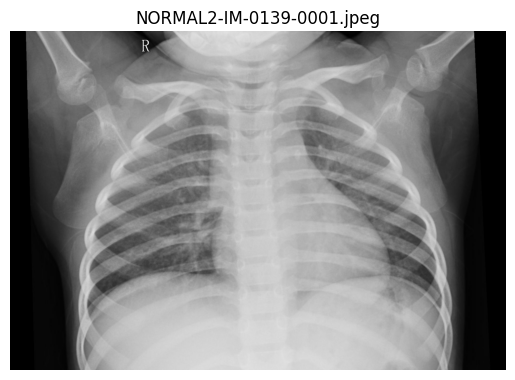

------> NORMAL2-IM-0073-0001.jpeg


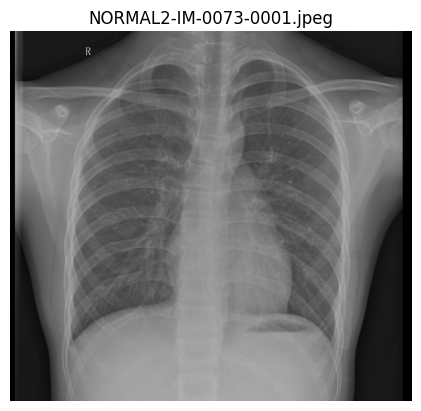

------> NORMAL2-IM-0092-0001.jpeg


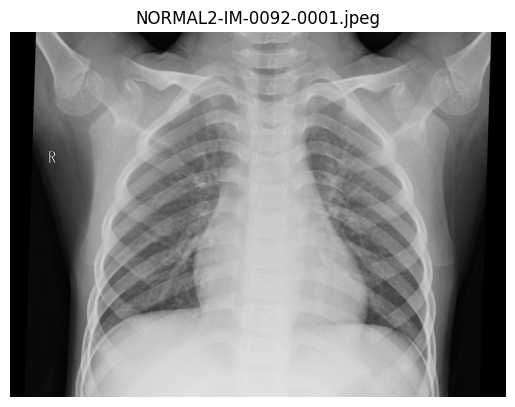

------> NORMAL2-IM-0120-0001.jpeg


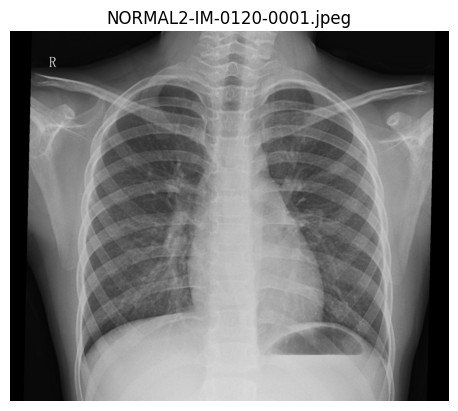

------> NORMAL2-IM-0035-0001.jpeg


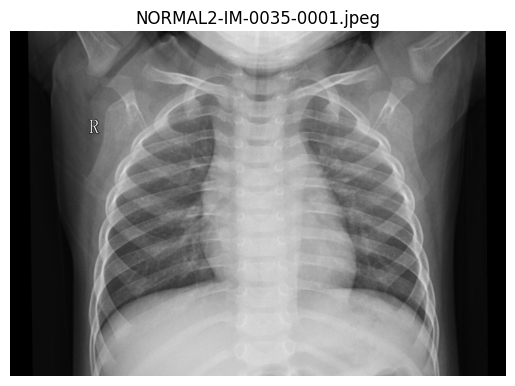

------> NORMAL2-IM-0052-0001.jpeg


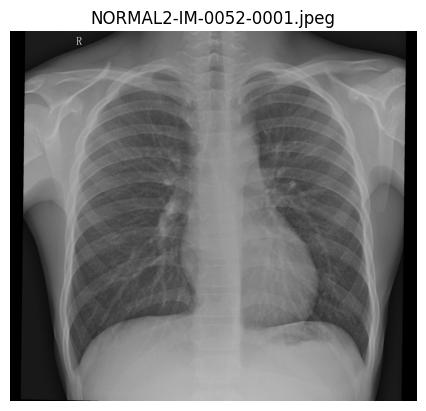

------> NORMAL2-IM-0111-0001.jpeg


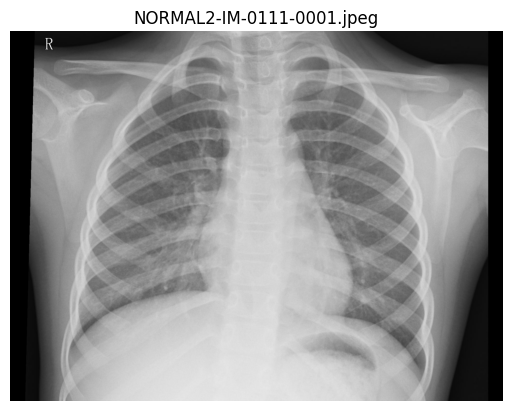

------> NORMAL2-IM-0112-0001.jpeg


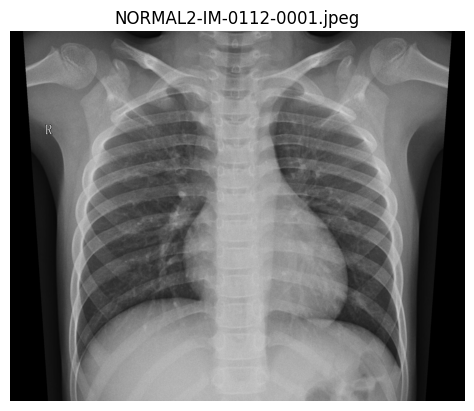

------> NORMAL2-IM-0132-0001.jpeg


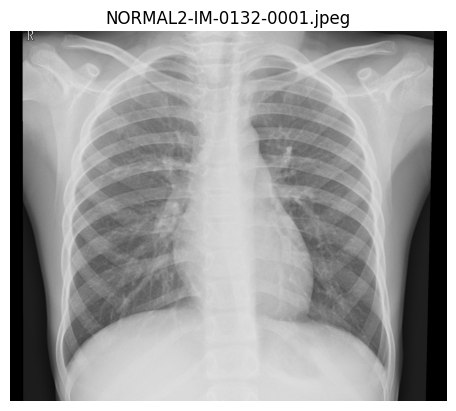

------> NORMAL2-IM-0171-0001.jpeg


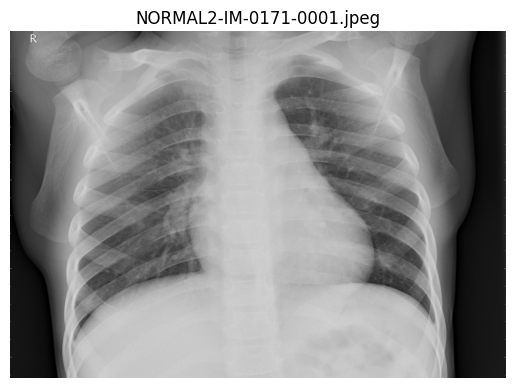

------> NORMAL2-IM-0058-0001.jpeg


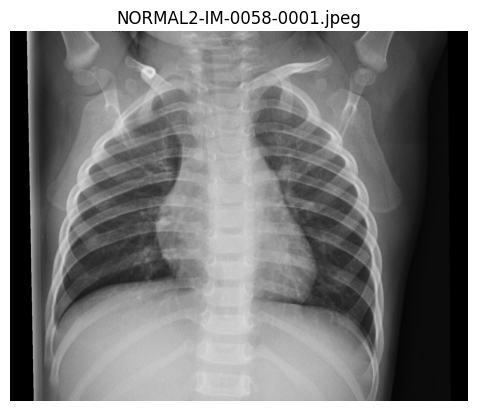

------> NORMAL2-IM-0145-0001.jpeg


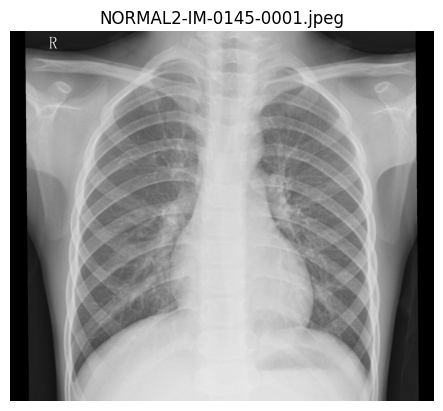

------> NORMAL2-IM-0059-0001.jpeg


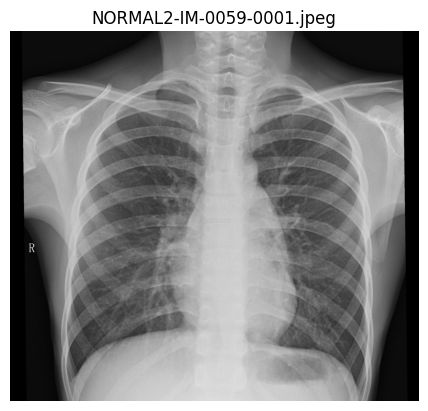

------> NORMAL2-IM-0105-0001.jpeg


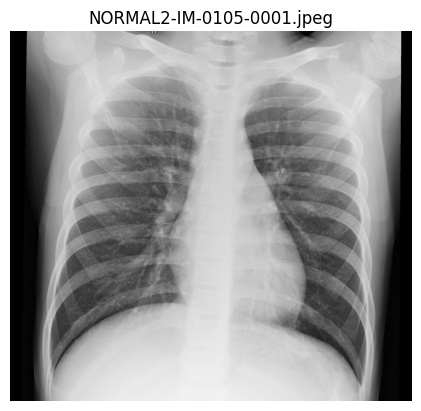

------> NORMAL2-IM-0131-0001.jpeg


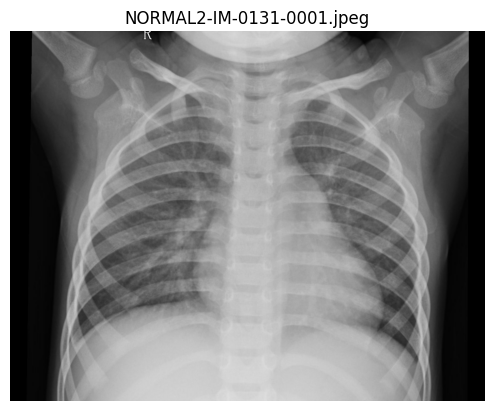

------> NORMAL2-IM-0110-0001.jpeg


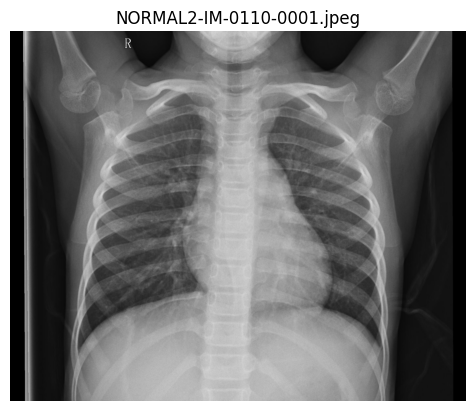

------> NORMAL2-IM-0117-0001.jpeg


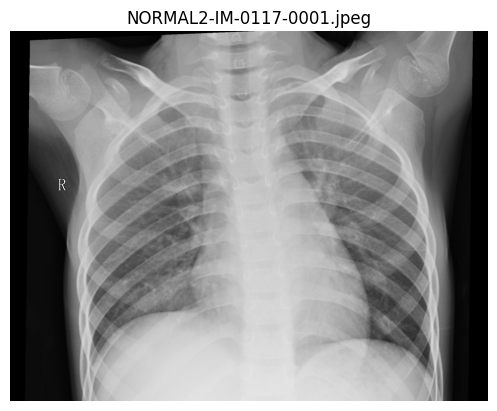

------> NORMAL2-IM-0130-0001.jpeg


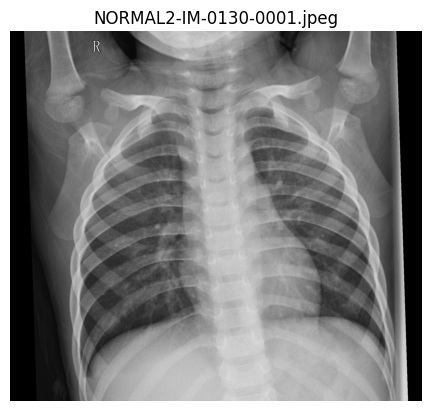

------> NORMAL2-IM-0072-0001.jpeg


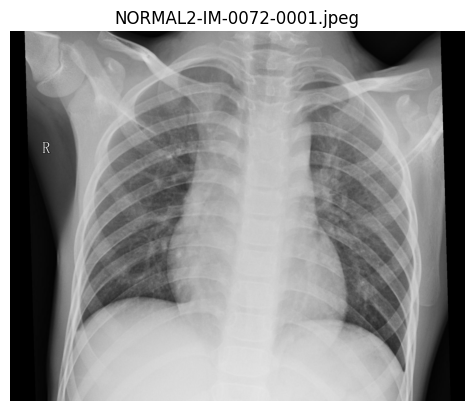

------> NORMAL2-IM-0123-0001.jpeg


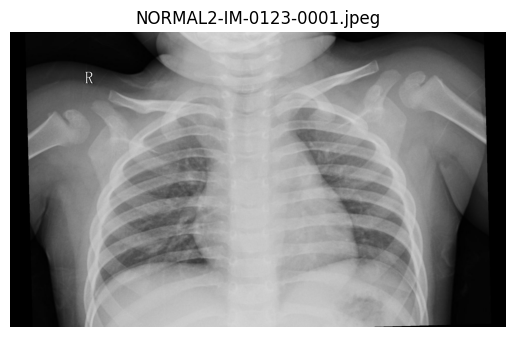

In [50]:
for fol in os.listdir(path):
    print(fol)
    for fol2 in os.listdir(os.path.join(path,fol)):
        print("--->",fol2)
        for fol3 in os.listdir(os.path.join(path,fol,fol2)):
            print("------>",fol3)
            img = os.path.join(path,fol,fol2,fol3)
            img = cv.imread(img)
            img = cv.cvtColor(img , cv.COLOR_BGR2RGB)
            
            plt.imshow(img)
            plt.title(fol3)
            plt.axis('off')
            plt.show()
    break 

In [51]:
import tensorflow as tf
from tensorflow.keras import layers, models , Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Dense , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator as dag
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
h,w=224,224
b_size=64

In [53]:
data_datagen = dag(rescale = 1./255)
train_generation = data_datagen.flow_from_directory(
    df_train,
    target_size = (h,w),
    batch_size = b_size,
    class_mode = 'binary',
    color_mode = 'grayscale'
)

test_generation = data_datagen.flow_from_directory(
    df_test,
    target_size = (h,w),
    batch_size = b_size,
    class_mode = 'binary',
    color_mode = 'grayscale',
    shuffle = False
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [54]:
train_generation.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [55]:
test_generation.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [56]:
model = Sequential([
    Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (h , w , 1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64 , (3,3) , activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(.5),
    
    Conv2D(128 , (3,3) , activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(256 , (3,3) ,activation = 'relu'),
    MaxPooling2D((2,2)),
    Dropout(.5),
    
    Flatten(),
    Dense(128 , activation = 'relu'),
    Dense(1 , activation = 'sigmoid')
])

In [57]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,718,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,106,689 (19.48 MB)

 Trainable params: 5,106,689 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
epochs = 15
earlystop = EarlyStopping(patience = 5)

history = model.fit(
    train_generation ,
    epochs = epochs ,
    batch_size = b_size,
    validation_data = test_generation,
    callbacks = [earlystop]
)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.9732 - loss: 0.0854 - val_accuracy: 0.9750 - val_loss: 0.0554
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9561 - loss: 0.1082 - val_accuracy: 0.9750 - val_loss: 0.0691
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.9495 - loss: 0.1379 - val_accuracy: 1.0000 - val_loss: 0.0482
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.9613 - loss: 0.0965 - val_accuracy: 0.9750 - val_loss: 0.0565
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.8859 - loss: 0.1812 - val_accuracy: 1.0000 - val_loss: 0.1034
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.8743 - loss: 0.2891 - val_accuracy: 0.9750 - val_loss: 0.1816
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.9087 - loss: 0.2282 - val_accuracy: 0.8500 - val_loss: 0.2725
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.8165 - loss: 0.4357 - val_accuracy: 1.0000 - val_loss: 0.2241


In [62]:
loss , accuracy = model.evaluate(test_generation)
print(f"The Loss is : {loss}")
print(f"The accuracy is : {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.2241
The Loss is : 0.22408652305603027
The accuracy is : 1.0


In [63]:
model.save('COVID-19 Xray Detection.h5')

In [65]:
image_path = r"/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg"
image_pil = Image.open(image_path).convert("RGB")

In [66]:
image_np = tf.keras.utils.img_to_array(image_pil)

img_gray = cv.cvtColor(image_np, cv.COLOR_RGB2GRAY)

img_resized = cv.resize(img_gray, (224, 224))

img_norm = img_resized / 255.0

img_input = img_norm.reshape(1, 224, 224, 1)

In [67]:
predict = model.predict(img_input)[0][0]
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


0.1142504

In [68]:
if predict >= .5:
    print("PNEUMONIA")
else:
    print('NORMAL')

NORMAL
